<a href="https://colab.research.google.com/github/Nishakumari-2004/AirQuality/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
path=path="/content/drive/MyDrive/Colab Notebooks/Air Quality2023.csv"
df=pd.read_csv(path)
df.head(10)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2023-01-01,41.932257,64.888819,7.927986,2.270590,10.243299,10.280486,6.412083,0.711181,6.499062,...,3.020208,23.941215,63.115590,0.597743,130.098194,0.0,0.0,156.368472,NaN,NaN
1,2023-01-02,41.133929,65.715000,7.156190,2.413214,9.516032,9.530595,8.181548,0.727738,9.014167,...,3.176627,24.136786,65.014286,0.727738,110.722262,0.0,0.0,157.066667,NaN,NaN
2,2023-01-03,41.373088,63.286324,7.869412,2.450000,10.534219,7.562059,5.853235,0.716029,5.749559,...,3.023971,25.296618,56.613382,0.946029,113.351765,0.0,0.0,207.276324,NaN,NaN
3,2023-01-04,36.563750,57.692159,6.987727,3.186591,10.117500,10.766705,6.526250,0.755000,8.359432,...,4.206705,23.133977,62.572955,1.070909,116.885341,0.0,0.0,157.610227,NaN,NaN
4,2023-01-05,42.219479,65.860104,7.558177,2.398594,9.908111,10.812500,5.228281,0.718958,10.572812,...,3.933542,24.270365,64.667865,0.907708,98.659948,0.0,0.0,214.899479,NaN,NaN
5,2023-01-06,48.123696,75.128370,7.417935,2.443370,9.992841,8.454674,5.223587,0.736848,4.318696,...,3.126739,21.563478,80.317935,0.527174,65.415000,0.0,0.0,59.451196,NaN,NaN
6,2023-01-07,48.265208,71.710104,6.164583,2.345694,8.534638,8.977292,6.700556,0.655486,6.908819,...,3.100833,21.071389,64.930764,0.678785,92.911563,0.0,0.0,169.121042,NaN,NaN
7,2023-01-08,40.420486,63.598403,5.826632,2.637431,8.452917,9.603611,5.993958,0.724896,8.938715,...,2.904236,18.879444,49.276424,0.853472,120.837361,0.0,0.0,161.527049,NaN,NaN
8,2023-01-09,46.203368,69.630417,8.306632,2.428333,10.719965,9.809931,6.687847,0.692396,7.995000,...,3.108403,19.027396,48.555868,0.531528,132.749792,0.0,0.0,152.590729,NaN,NaN
9,2023-01-10,46.619410,71.314271,6.175035,2.403056,8.607118,10.770278,5.927118,0.705417,7.771285,...,2.960382,20.391875,49.689097,0.599653,110.388299,0.0,0.0,151.823090,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            365 non-null    object 
 1   PM2.5 (µg/m³)        346 non-null    float64
 2   PM10 (µg/m³)         346 non-null    float64
 3   NO (µg/m³)           346 non-null    float64
 4   NO2 (µg/m³)          346 non-null    float64
 5   NOx (ppb)            346 non-null    float64
 6   NH3 (µg/m³)          346 non-null    float64
 7   SO2 (µg/m³)          346 non-null    float64
 8   CO (mg/m³)           346 non-null    float64
 9   Ozone (µg/m³)        346 non-null    float64
 10  Benzene (µg/m³)      346 non-null    float64
 11  Toluene (µg/m³)      346 non-null    float64
 12  Xylene (µg/m³)       346 non-null    float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  Eth-Benzene (µg/m³)  346 non-null    float64
 15  MP-Xylene (µg/m³)    345 non-null    flo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isnull()  #displays true if there are null values

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
361,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
df.shape

(365, 25)

In [ ]:
df.isnull().sum()

Timestamp                0
PM2.5 (µg/m³)           19
PM10 (µg/m³)            19
NO (µg/m³)              19
NO2 (µg/m³)             19
NOx (ppb)               19
NH3 (µg/m³)             19
SO2 (µg/m³)             19
CO (mg/m³)              19
Ozone (µg/m³)           19
Benzene (µg/m³)         19
Toluene (µg/m³)         19
Xylene (µg/m³)          19
O Xylene (µg/m³)       365
Eth-Benzene (µg/m³)     19
MP-Xylene (µg/m³)       20
AT (°C)                 19
RH (%)                  19
WS (m/s)                19
WD (deg)                19
RF (mm)                 19
TOT-RF (mm)              0
SR (W/mt2)              19
BP (mmHg)              365
VWS (m/s)              365
dtype: int64

In [ ]:
#copy the data for time saving in case any error is there
data=df.copy()
# cant remove rows because dataset is small

In [ ]:
df2=data.select_dtypes(include=np.number)
def fill_na_with_avg(df2):
    for col in df2.columns:
        for i in range(2, len(df2) - 1):
            if pd.isna(df2.at[i, col]):
                prev_2_prev_val = df2.at[i-2,col]
                prev_val = df2.at[i - 1, col]
                next_val = df2.at[i + 1, col]
                if(pd.isna(next_val)):
                    df2.at[i, col] = (prev_val+prev_2_prev_val)/2
                if pd.notna(prev_val) and pd.notna(next_val) :
                    df2.at[i, col] = (prev_val + next_val) / 2

    return df2


data2 = fill_na_with_avg(df2)

data2

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,41.932257,64.888819,7.927986,2.270590,10.243299,10.280486,6.412083,0.711181,6.499062,0.727431,...,3.020208,23.941215,63.115590,0.597743,130.098194,0.0,0.0,156.368472,NaN,NaN
1,41.133929,65.715000,7.156190,2.413214,9.516032,9.530595,8.181548,0.727738,9.014167,0.696429,...,3.176627,24.136786,65.014286,0.727738,110.722262,0.0,0.0,157.066667,NaN,NaN
2,41.373088,63.286324,7.869412,2.450000,10.534219,7.562059,5.853235,0.716029,5.749559,0.502941,...,3.023971,25.296618,56.613382,0.946029,113.351765,0.0,0.0,207.276324,NaN,NaN
3,36.563750,57.692159,6.987727,3.186591,10.117500,10.766705,6.526250,0.755000,8.359432,0.693295,...,4.206705,23.133977,62.572955,1.070909,116.885341,0.0,0.0,157.610227,NaN,NaN
4,42.219479,65.860104,7.558177,2.398594,9.908111,10.812500,5.228281,0.718958,10.572812,0.621146,...,3.933542,24.270365,64.667865,0.907708,98.659948,0.0,0.0,214.899479,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,22.604657,87.651765,5.148137,9.559069,14.682990,7.889853,10.584219,1.278039,32.586765,2.106029,...,0.829706,21.566275,70.312500,0.582500,108.917990,0.0,0.0,238.806667,NaN,NaN
361,18.410349,79.478868,4.695180,9.300541,13.918465,7.700656,10.618533,0.917978,26.669980,1.917355,...,0.820929,22.750116,62.141285,0.541528,93.349099,0.0,0.0,211.210799,NaN,NaN
362,14.216042,71.305972,4.242222,9.042014,13.153939,7.511458,10.652847,0.557917,20.753194,1.728681,...,0.812153,23.933958,53.970069,0.500556,77.780208,0.0,0.0,183.614931,NaN,NaN
363,14.672014,71.481493,5.512326,8.627292,14.113229,6.845521,10.625035,0.757292,16.693646,2.266458,...,0.809965,21.204861,71.200417,0.443264,97.924722,0.0,0.0,164.602014,NaN,NaN


In [ ]:
row_index=22
data2.iloc[row_index]
# checked for 23rd row

PM2.5 (µg/m³)           40.673530
PM10 (µg/m³)            63.641294
NO (µg/m³)               6.472776
NO2 (µg/m³)              2.549087
NOx (ppb)                9.022101
NH3 (µg/m³)              9.073385
SO2 (µg/m³)              6.376084
CO (mg/m³)               0.687412
Ozone (µg/m³)            7.970021
Benzene (µg/m³)          0.577544
Toluene (µg/m³)          0.781448
Xylene (µg/m³)           3.502236
O Xylene (µg/m³)              NaN
Eth-Benzene (µg/m³)      0.590489
MP-Xylene (µg/m³)        3.033416
AT (°C)                 21.571932
RH (%)                  58.387846
WS (m/s)                 0.811478
WD (deg)               119.800909
RF (mm)                  0.000000
TOT-RF (mm)              0.000000
SR (W/mt2)             156.933014
BP (mmHg)                     NaN
VWS (m/s)                     NaN
Name: 22, dtype: float64

In [ ]:
# # Calculate the mean excluding non-numeric columns
# numeric_mean = data2.select_dtypes(include=np.number).mean()

# # Fill null values with the mean
# data2 = data2.fillna(numeric_mean)
# data2

In [ ]:
data2=data2.drop(columns=['O Xylene (µg/m³)','BP (mmHg)','VWS (m/s)'])
data2

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2)
0,41.932257,64.888819,7.927986,2.270590,10.243299,10.280486,6.412083,0.711181,6.499062,0.727431,...,2.893194,0.630347,3.020208,23.941215,63.115590,0.597743,130.098194,0.0,0.0,156.368472
1,41.133929,65.715000,7.156190,2.413214,9.516032,9.530595,8.181548,0.727738,9.014167,0.696429,...,2.970595,0.657262,3.176627,24.136786,65.014286,0.727738,110.722262,0.0,0.0,157.066667
2,41.373088,63.286324,7.869412,2.450000,10.534219,7.562059,5.853235,0.716029,5.749559,0.502941,...,2.684559,0.589412,3.023971,25.296618,56.613382,0.946029,113.351765,0.0,0.0,207.276324
3,36.563750,57.692159,6.987727,3.186591,10.117500,10.766705,6.526250,0.755000,8.359432,0.693295,...,2.146932,2.503523,4.206705,23.133977,62.572955,1.070909,116.885341,0.0,0.0,157.610227
4,42.219479,65.860104,7.558177,2.398594,9.908111,10.812500,5.228281,0.718958,10.572812,0.621146,...,3.147813,1.003177,3.933542,24.270365,64.667865,0.907708,98.659948,0.0,0.0,214.899479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,22.604657,87.651765,5.148137,9.559069,14.682990,7.889853,10.584219,1.278039,32.586765,2.106029,...,0.786225,0.961520,0.829706,21.566275,70.312500,0.582500,108.917990,0.0,0.0,238.806667
361,18.410349,79.478868,4.695180,9.300541,13.918465,7.700656,10.618533,0.917978,26.669980,1.917355,...,0.777939,0.967704,0.820929,22.750116,62.141285,0.541528,93.349099,0.0,0.0,211.210799
362,14.216042,71.305972,4.242222,9.042014,13.153939,7.511458,10.652847,0.557917,20.753194,1.728681,...,0.769653,0.973889,0.812153,23.933958,53.970069,0.500556,77.780208,0.0,0.0,183.614931
363,14.672014,71.481493,5.512326,8.627292,14.113229,6.845521,10.625035,0.757292,16.693646,2.266458,...,0.780729,0.952118,0.809965,21.204861,71.200417,0.443264,97.924722,0.0,0.0,164.602014


In [ ]:
data2.describe()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,35.217468,69.540203,3.970131,7.328572,11.244278,9.705223,8.536408,0.676351,15.310515,1.501102,...,1.432950,1.500630,1.448275,26.063051,62.253052,0.839326,158.418025,0.059483,0.034332,186.309293
std,9.448872,17.423491,1.495731,2.164075,2.216240,1.632696,1.993003,0.124979,5.123832,0.726064,...,0.910016,0.714077,0.790931,3.263630,16.752638,0.425759,56.962095,0.309496,0.164637,84.971056
min,7.098452,36.509802,2.116389,2.270590,6.707083,5.660208,4.819000,0.317500,4.318696,0.411333,...,0.616667,0.432549,0.628512,17.395833,28.042255,0.196250,40.869359,0.000000,0.000000,11.638167
25%,28.315833,56.792500,2.906910,6.293368,9.528333,8.566970,6.910208,0.603368,12.028542,0.964722,...,0.878299,0.967704,0.958924,23.759051,49.099201,0.546373,108.640833,0.000000,0.000000,146.521458
50%,35.540590,66.096627,3.333625,7.756422,10.894808,9.609896,8.061354,0.687412,15.322292,1.228977,...,1.075347,1.292235,1.107465,25.832187,64.682976,0.722222,153.638229,0.000000,0.000000,176.022812
75%,41.112778,77.171667,4.712257,8.921319,12.646333,10.621042,10.084239,0.747500,17.646111,2.100694,...,1.562812,2.063889,1.625833,27.972941,73.752000,1.022326,210.628698,0.000000,0.000000,231.952656
max,65.962794,158.741759,10.245109,16.377255,25.108902,14.359687,16.131268,1.278039,36.471250,6.693264,...,7.469306,4.518512,4.684917,35.137500,99.156429,2.604750,313.445451,2.958333,1.458333,631.911296


In [ ]:
data2.isnull().sum()

PM2.5 (µg/m³)          0
PM10 (µg/m³)           0
NO (µg/m³)             0
NO2 (µg/m³)            0
NOx (ppb)              0
NH3 (µg/m³)            0
SO2 (µg/m³)            0
CO (mg/m³)             0
Ozone (µg/m³)          0
Benzene (µg/m³)        0
Toluene (µg/m³)        0
Xylene (µg/m³)         0
Eth-Benzene (µg/m³)    0
MP-Xylene (µg/m³)      0
AT (°C)                0
RH (%)                 0
WS (m/s)               0
WD (deg)               0
RF (mm)                0
TOT-RF (mm)            0
SR (W/mt2)             0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

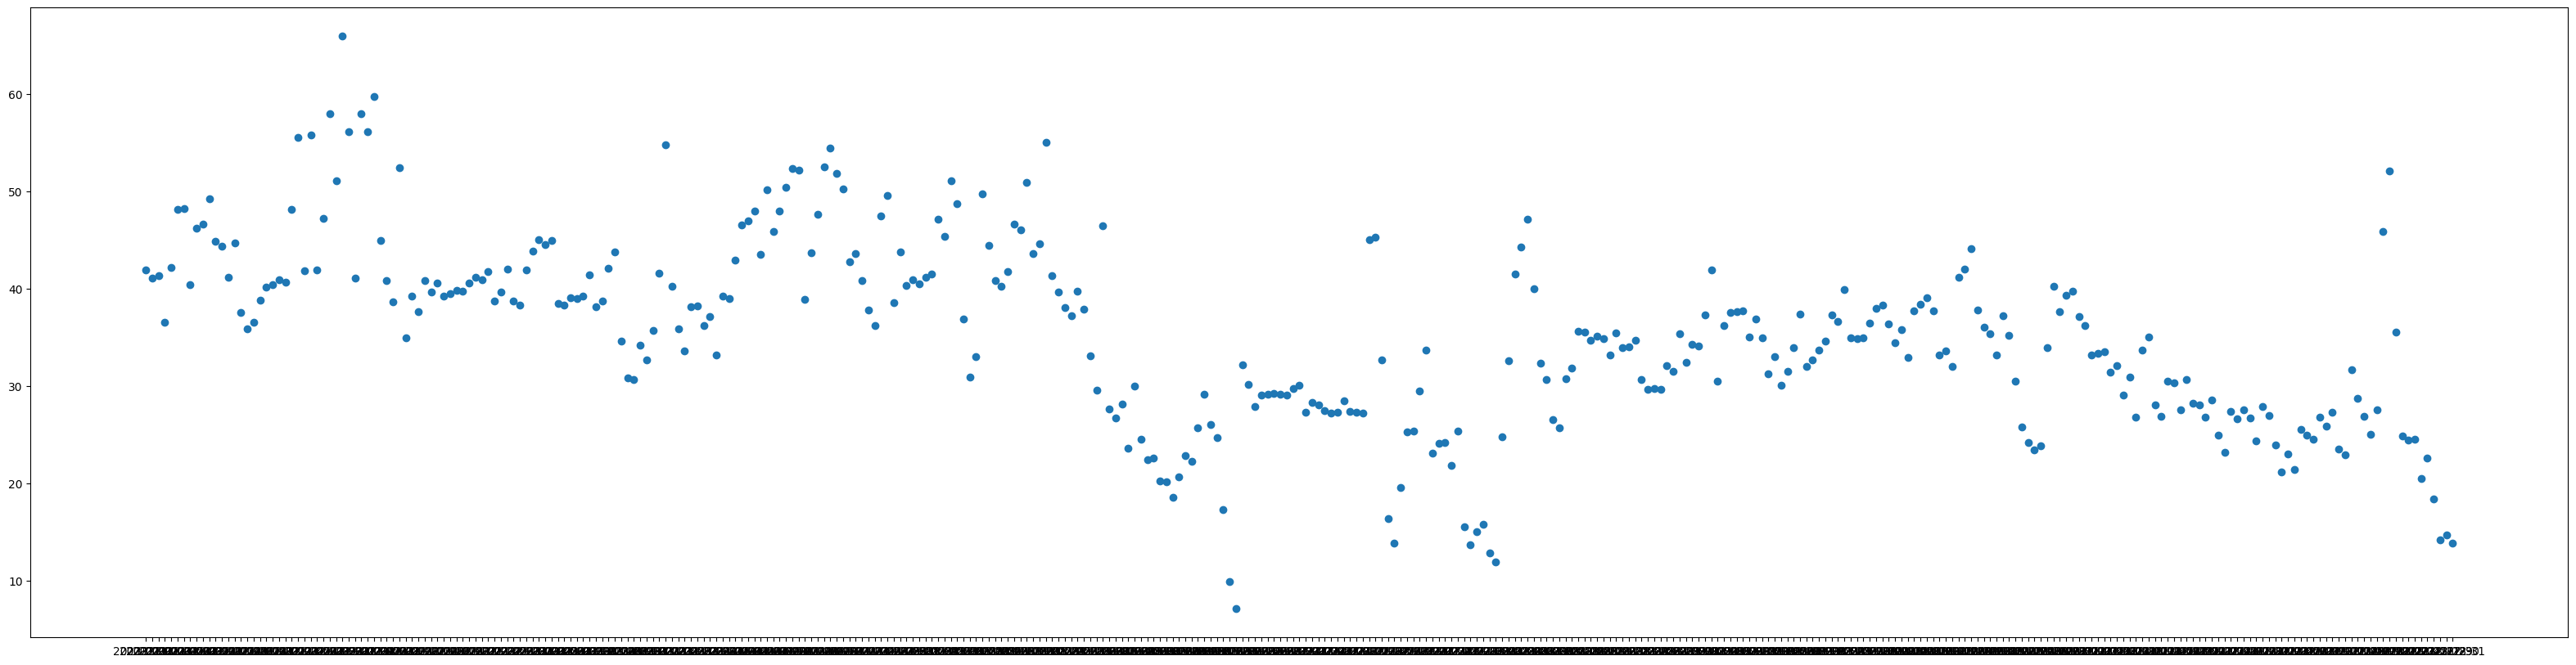

In [ ]:
plt.figure(figsize=(40,10))
plt.scatter(y=data2['PM2.5 (µg/m³)'],x=data['Timestamp'])  # data2 doesnt contain timestamp

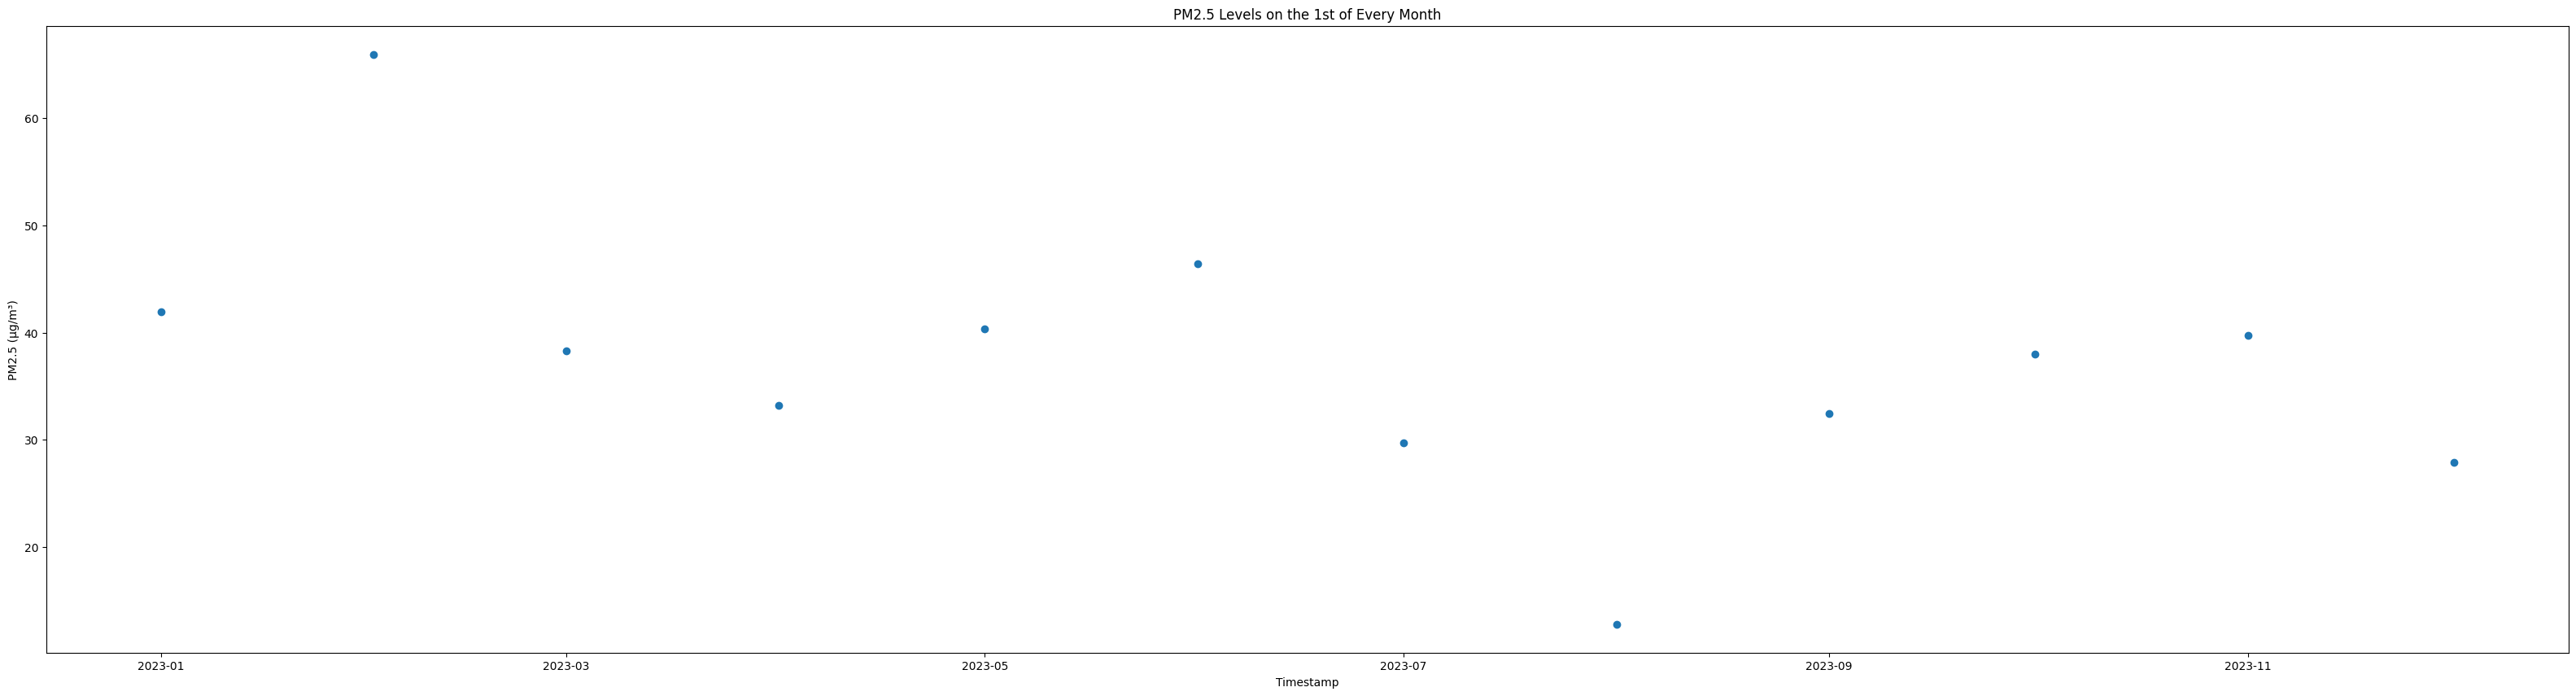

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter to get only the 1st of each month
first_of_month_data = data[data['Timestamp'].dt.day == 1]
first_of_month_data2 = data2.iloc[first_of_month_data.index]

# Plot the filtered data
plt.figure(figsize=(40,10))
plt.scatter(x=first_of_month_data['Timestamp'], y=first_of_month_data2['PM2.5 (µg/m³)'])
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Levels on the 1st of Every Month')
plt.show()

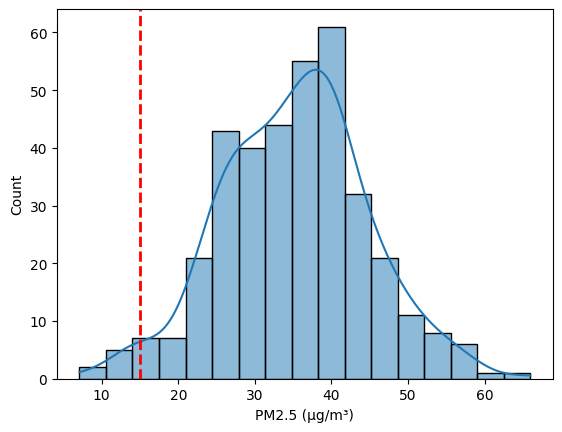

In [ ]:
fig2=sns.histplot(data2['PM2.5 (µg/m³)'],kde=True)
plt.axvline(15, color='r', linestyle='--', linewidth=2, label=f'Threshold = {15}')
# References:
# ->curve is normally distributed,this means
# the values do not have much deviation from the mean,most values are clustered
# around the mean

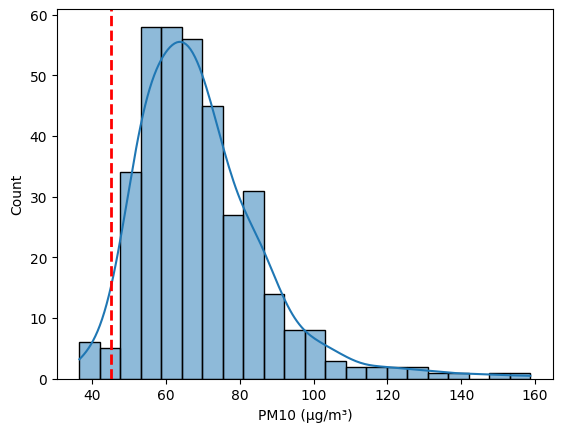

In [ ]:
fig2=sns.histplot(data2['PM10 (µg/m³)'],kde=True)
plt.axvline(45, color='r', linestyle='--', linewidth=2, label=f'Threshold = {45}')
# References:
# ->right skewed-higher PM10 concentrations are less frequent
# spread is more,so higher variability

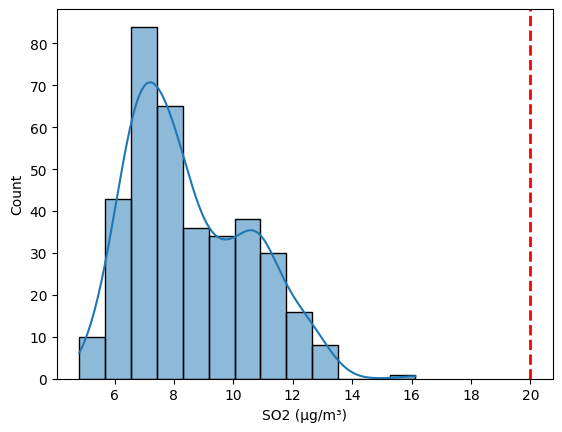

In [ ]:
fig2=sns.histplot(data2['SO2 (µg/m³)'],kde=True)
plt.axvline(20, color='r', linestyle='--', linewidth=2, label=f'Threshold = {20}')

In [ ]:
# similarly,we can see other graphs too

In [ ]:
corr_matrix = data2.select_dtypes(include=np.number).corr()
corr_matrix

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,Xylene (µg/m³),Eth-Benzene (µg/m³),MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2)
PM2.5 (µg/m³),1.000000,0.258642,0.047375,-0.469701,-0.442777,-0.136858,-0.272139,0.115153,-0.177017,0.144458,...,0.220889,0.187984,0.295168,0.110553,-0.402188,-0.292212,-0.208226,-0.015659,-0.037857,0.087080
PM10 (µg/m³),0.258642,1.000000,-0.079210,0.146705,0.106867,0.015245,0.138793,-0.038930,0.115587,-0.009096,...,-0.067977,-0.021999,-0.001020,0.062917,-0.026093,-0.170610,-0.073853,0.066757,0.012608,0.025057
NO (µg/m³),0.047375,-0.079210,1.000000,-0.347797,0.334839,0.151532,-0.073286,0.308627,-0.315129,-0.417419,...,0.636059,-0.489692,0.660787,-0.272388,-0.012807,0.099861,-0.125397,-0.094218,-0.108317,-0.099091
NO2 (µg/m³),-0.469701,0.146705,-0.347797,1.000000,0.736866,0.220634,0.635438,-0.107891,0.416638,0.063927,...,-0.428922,0.065592,-0.567042,0.089521,0.455245,0.088349,0.282094,0.154087,0.155410,0.007135
NOx (ppb),-0.442777,0.106867,0.334839,0.736866,1.000000,0.329278,0.579562,0.107633,0.191941,-0.197476,...,0.020056,-0.243774,-0.106364,-0.104072,0.438454,0.139807,0.184451,0.076751,0.078358,-0.064826
NH3 (µg/m³),-0.136858,0.015245,0.151532,0.220634,0.329278,1.000000,0.085987,0.203403,0.015865,-0.113926,...,0.111931,0.018345,0.027872,0.173452,0.062631,0.387060,0.265706,0.025978,-0.003914,-0.042656
SO2 (µg/m³),-0.272139,0.138793,-0.073286,0.635438,0.579562,0.085987,1.000000,-0.112650,0.277130,-0.153949,...,-0.173818,-0.186019,-0.227188,-0.172612,0.482076,-0.254342,-0.002509,0.223916,0.181146,-0.053427
CO (mg/m³),0.115153,-0.038930,0.308627,-0.107891,0.107633,0.203403,-0.112650,1.000000,-0.064083,0.007716,...,0.314167,0.046779,0.178885,0.020448,-0.154897,0.165270,0.008473,-0.025325,-0.047695,-0.097235
Ozone (µg/m³),-0.177017,0.115587,-0.315129,0.416638,0.191941,0.015865,0.277130,-0.064083,1.000000,0.218625,...,-0.387911,0.252585,-0.442646,0.305426,-0.010020,-0.037299,0.129717,0.056692,0.021495,0.352282
Benzene (µg/m³),0.144458,-0.009096,-0.417419,0.063927,-0.197476,-0.113926,-0.153949,0.007716,0.218625,1.000000,...,-0.449668,0.674235,-0.391355,0.436565,-0.311707,-0.090468,0.059980,-0.014221,-0.011681,0.290755


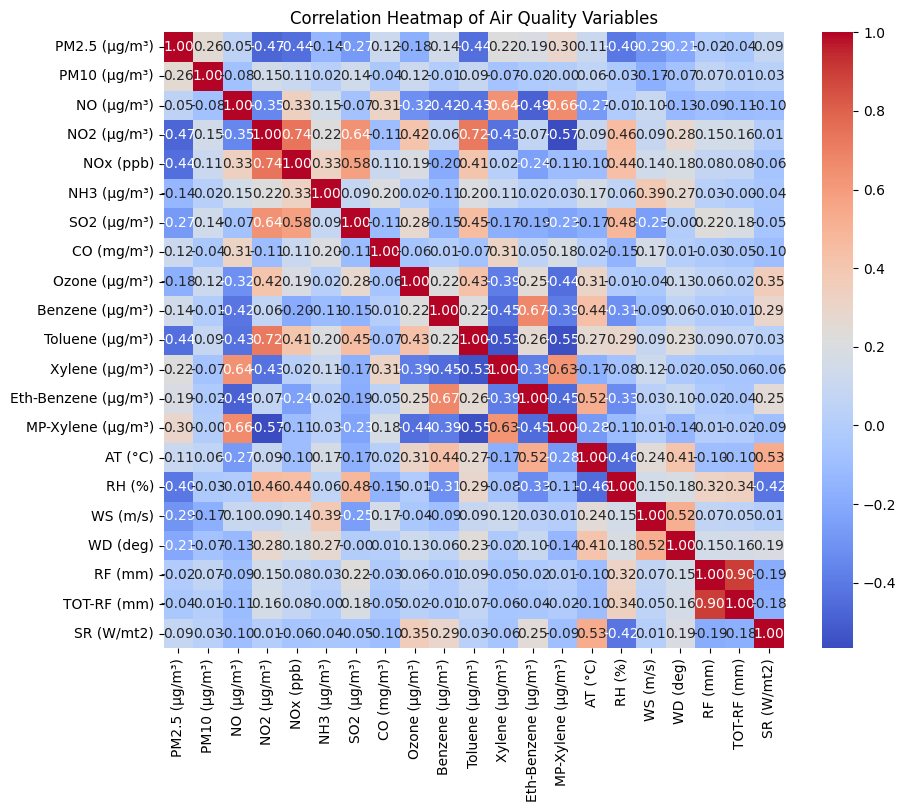

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# .2f means till 2 decimal placces
plt.title('Correlation Heatmap of Air Quality Variables')
plt.show()

In [ ]:
# now analysising the meterological variables

In [ ]:
# comparing with meterological variables
df=pd.DataFrame(data2)
features=df[['RH (%)' ,'WS (m/s)','SR (W/mt2)' ,'WD (deg)']]
label=df['AT (°C)']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.2)

In [ ]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 5.206969663914647
R^2 Score: 0.5282670817282884


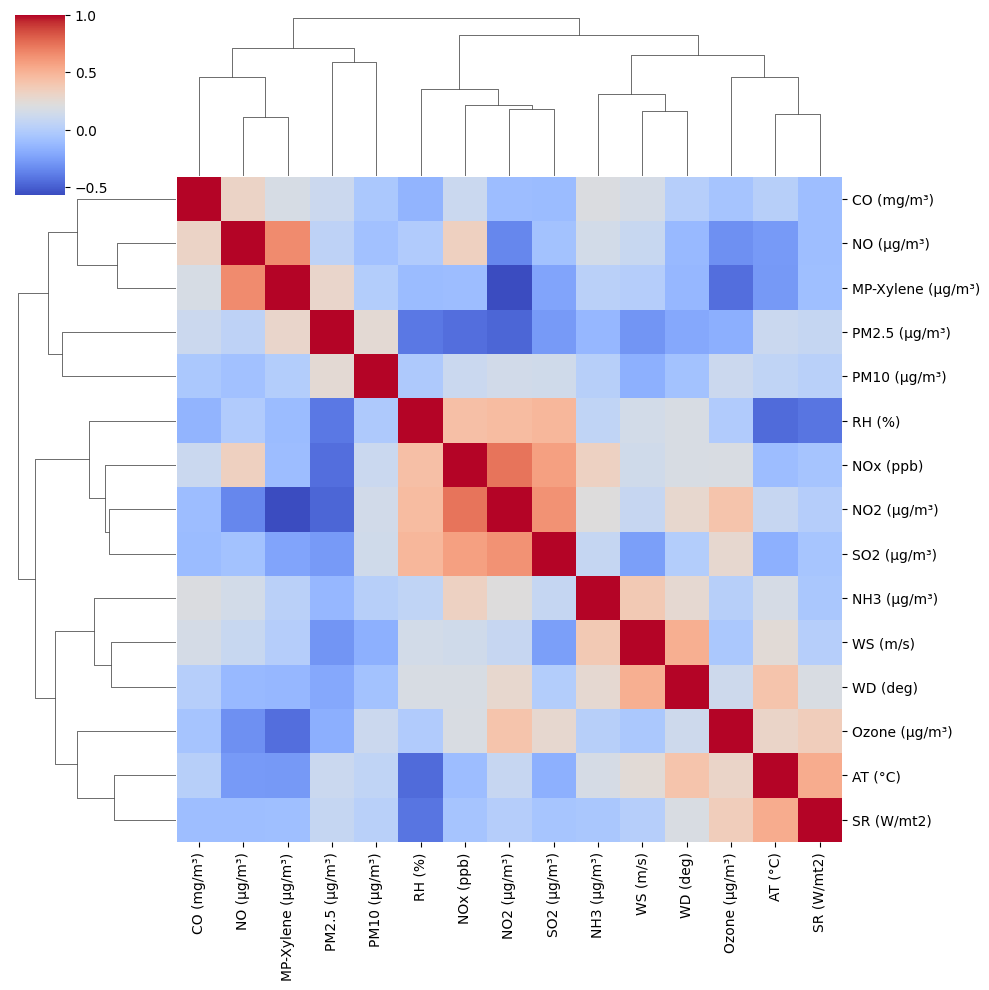

In [ ]:
X=df[['PM2.5 (µg/m³)'  ,'PM10 (µg/m³)'	,'NO (µg/m³)'	,'NO2 (µg/m³)'  ,'NOx (ppb)'	,'NH3 (µg/m³)'	,'SO2 (µg/m³)'	,'CO (mg/m³)'	,'Ozone (µg/m³)' ,'MP-Xylene (µg/m³)'	,'AT (°C)'	,'RH (%)','WS (m/s)','SR (W/mt2)' ,'WD (deg)']]
# Calculate correlation matrix
corr = X.corr()

# Create cluster heatmap
sns.clustermap(corr, cmap='coolwarm')


In [ ]:
# remove highly correlated features.

In [ ]:
# function to remove highly correlated feature

In [ ]:
def correlation(dataset,threshold):
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                feature_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
                correlated_pairs.append(feature_pair)

    return correlated_pairs

In [ ]:
corr_features=correlation(X_train,0.5)
corr_features

[('WD (deg)', 'WS (m/s)')]

In [ ]:
# all the other features are not correlated with each other

In [ ]:
# checking for the days which crossed permisiible value and then for seasonality


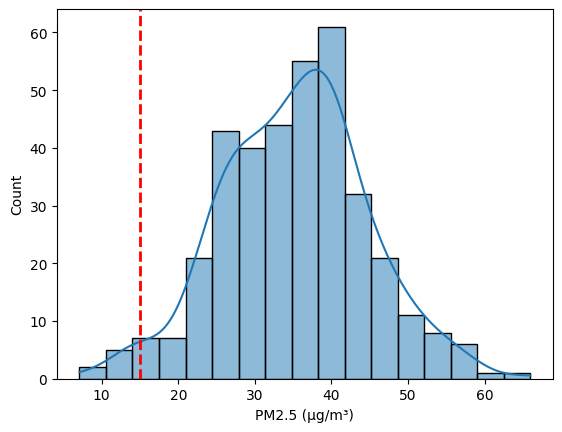

In [ ]:
fig2=sns.histplot(data2['PM2.5 (µg/m³)'],kde=True)
plt.axvline(15, color='r', linestyle='--', linewidth=2, label=f'Threshold = {15}')
# cdf plot krna h

In [ ]:
permissible_level=15

In [ ]:
exceed_days = data2[data2['PM2.5 (µg/m³)'] > permissible_level].shape[0]
print(f"Number of days exceeding the permissible level: {exceed_days}")

Number of days exceeding the permissible level: 356


In [ ]:
# most of the days PM2.5 has crossed its permissible value

In [ ]:
data['date'] = pd.to_datetime(data['Timestamp'])
data['month'] = data['Timestamp'].dt.month
data['season'] = data['Timestamp'].dt.month % 12 // 3 + 1

In [ ]:
seasonal_data = data.groupby('season').agg({'PM2.5 (µg/m³)': ['mean', 'max', 'min', 'count']})
print(seasonal_data)

       PM2.5 (µg/m³)                            
                mean        max        min count
season                                          
1          37.905930  65.962794  13.858264    86
2          42.047349  55.044271  29.575417    92
3          27.829173  47.109524   7.098452    83
4          33.285208  44.088750  23.190389    85


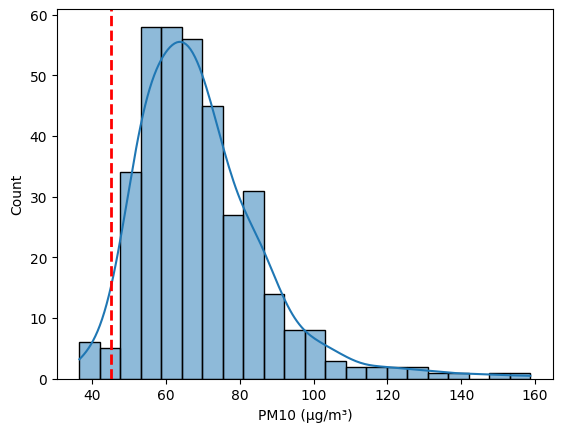

In [ ]:
fig2=sns.histplot(data2['PM10 (µg/m³)'],kde=True)
plt.axvline(45, color='r', linestyle='--', linewidth=2, label=f'Threshold = {45}')

In [ ]:
exceed_days = data2[data2['PM10 (µg/m³)'] > permissible_level].shape[0]
print(f"Number of days exceeding the permissible level: {exceed_days}")

Number of days exceeding the permissible level: 365


In [ ]:
seasonal_data = data.groupby('season').agg({'PM10 (µg/m³)': ['mean', 'max', 'min', 'count']})
print(seasonal_data)

       PM10 (µg/m³)                             
               mean         max        min count
season                                          
1         69.448288  158.741759  47.756927    86
2         70.814584  100.877917  48.804583    92
3         68.862443  141.565000  37.378135    83
4         68.830380  134.858125  36.509802    85


In [ ]:
# 1. the months from jan to march i.e. winters have recoreded the max
# value for both PM2.5  and PM10
# 2. the lowest concentration has been moticed in the months of monsoons for PM2.5
# and during the months of oct-dec for PM10

In [ ]:
# PM2.5 AND PM10 against rainfall -time series,for monsoons also other meteorological variables.
# if any peak,analyse the nearby days to conclude something
# repeat for other years too(CPCB) -for last 5-6 years

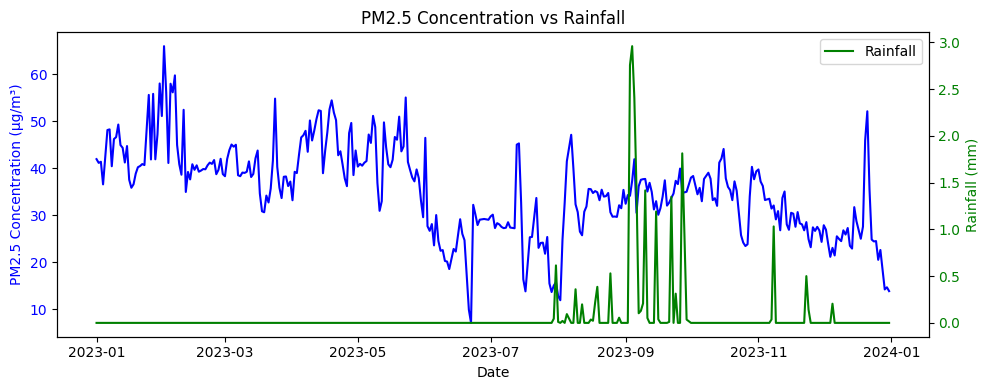

In [ ]:
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
pm25_concentration = data2['PM2.5 (µg/m³)']  # PM2.5 concentration values
rainfall = data2['RF (mm)']  # Rainfall values

# Create a DataFrame
data3 = pd.DataFrame({
    'Date': dates,
    'PM2.5 Concentration': pm25_concentration,
    'Rainfall': rainfall
})

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot PM2.5 concentration
ax1.plot(data3['Date'], data3['PM2.5 Concentration'], color='b', label='PM2.5 Concentration')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 Concentration (µg/m³)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for rainfall
ax2 = ax1.twinx()
ax2.plot(data3['Date'], data3['Rainfall'], color='g', label='Rainfall')
ax2.set_ylabel('Rainfall (mm)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('PM2.5 Concentration vs Rainfall')
fig.tight_layout()
plt.legend()

# Show plot
plt.show()

In [ ]:
# The peaks have been observed for the starting week of september in case of rainfall and in feb for PM2.5
#  Rainfall generally helps reduce PM2.5 concentrations by removing particles from the air through wet deposition.
# Therefore, periods of higher rainfall usually correlate with lower PM2.5 levels.(this can be seen in the plot too ,in the month of september,
# where the rainfall is high and the PM2.5 conc is relatively lower.)
# In dry seasons or periods, the lack of rain allows PM2.5 levels to build up, leading to higher concentrations.(This can be seen in the month of Feb where PM2.5 conc is high
# and rainfall is negligible)

In [ ]:
# moving window averaging
# components of time series
# with respect to relative humdity with temperature


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [ ]:
X=  data2.iloc[:,14:22] #all the features from temperature
y = data2.iloc[:, 0] #PM2.5

In [ ]:
### HyperParameters
# 1. number of hidden layers
# 2. number of neurons in hidden layers
# 3. what should be the learning rate

In [ ]:
def build_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):  #layers
        model.add(layers.Dense(units=hp.Int('units'+str(i),
                                            min_value=32, #min and max value of number of neurons
                                            max_value=512,step=32),
                              activation='relu'))
    model.add(layers.Dense(1,activation='linear')) #one output layer,regression prblm
    model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Choice('learning_rate',[0.01,0.001,0.0001])),
            loss='mean_absolute_error',
            metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner=RandomSearch(
    build_model,
    objective='val_mean_absolute_error', #this is for regression,
    max_trials=5,                        #for classification,it is val_accuracy
    executions_per_trial=3
)


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
tuner.search(X_train,y_train,epochs=5,
             validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 20s]
val_mean_absolute_error: 11.84143352508545

Best val_mean_absolute_error So Far: 10.219252268473307
Total elapsed time: 00h 01m 43s


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 3 summary
Hyperparameters:
num_layers: 2
units0: 352
units1: 160
learning_rate: 0.001
units2: 320
units3: 96
units4: 288
units5: 352
units6: 384
units7: 192
units8: 64
units9: 512
units10: 64
units11: 32
units12: 352
units13: 480
units14: 64
units15: 320
units16: 384
Score: 10.219252268473307

Trial 1 summary
Hyperparameters:
num_layers: 13
units0: 384
units1: 64
learning_rate: 0.0001
units2: 384
units3: 256
units4: 352
units5: 480
units6: 512
units7: 384
units8: 192
units9: 128
units10: 160
units11: 416
units12: 512
units13: 384
units14: 64
units15: 224
units16: 480
Score: 11.252357165018717

Trial 2 summary
Hyperparameters:
num_layers: 14
units0: 320
units1: 32
learning_rate: 0.0001
units2: 384
units3: 64
units4: 192
units5: 96
units6: 384
units7: 352
units8: 128
units9: 320
units10: 416
units11: 32
units12: 512
units13: 416
units14: 320
units15: 448
